## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data
mouse_metadata = pd.read_csv(mouse_metadata_path)
mouse_metadata.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [2]:
#Read the study results data
study_results = pd.read_csv(study_results_path)
study_results.head()

,Mouse ID,Timepoint,Tumour Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
#combine the data in single dataset
mouse_results_study = pd.merge(mouse_metadata,study_results, on="Mouse ID")



In [5]:
#Display the data tabelfor preview

mouse_results_study.head(15)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [6]:
# Checking the number of mice.
len(mouse_metadata["Mouse ID"].value_counts())
               

249

In [7]:
#Display the number of unique mice ID
mice_number=mouse_metadata["Mouse ID"].nunique()
total_micedf = pd.DataFrame({"Total MIce":[mice_number]})
total_micedf

,Total MIce
0,249


In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicates_mice = mouse_results_study.loc[mouse_results_study.duplicated(subset=["Mouse ID", "Timepoint"]),'Mouse ID'].unique()
duplicates_mice


array(['g989'], dtype=object)

In [9]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicates_mice = mouse_results_study.loc[mouse_results_study["Mouse ID"] == "g989", :]
duplicates_mice


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_dataframe = mouse_results_study[mouse_results_study['Mouse ID'].isin(duplicates_mice)==False]

clean_dataframe.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [11]:
# Checking the number of mice in the clean DataFrame.

clean_mice = clean_dataframe["Mouse ID"].value_counts()
clean_number_mice=len(clean_mice)
clean_number_mice


249

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumour volume. 

mean = clean_dataframe.groupby('Drug Regimen').mean()['Tumour Volume (mm3)']
median = clean_dataframe.groupby('Drug Regimen').median()['Tumour Volume (mm3)']
variance = clean_dataframe.groupby('Drug Regimen').var()['Tumour Volume (mm3)']
standard = clean_dataframe.groupby('Drug Regimen').std()['Tumour Volume (mm3)']
sem = clean_dataframe.groupby('Drug Regimen').sem()['Tumour Volume (mm3)']


summary_statistics = pd.DataFrame({"Mean Tumour Volume":mean,
                                   "Median Tumour Volume":median,
                                   "Tumour volume Variance":variance,
                                   "Tumour Volume Standard":standard,
                                   "Tumour Volume SEM":sem})

# Assemble the resulting series into a single summary dataframe.
summary_statistics.head(10)


,Mean Tumour Volume,Median Tumour Volume,Tumour volume Variance,Tumour Volume Standard,Tumour Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen

stastics = ['mean', 'median', 'variance','standard','sem']
# Using the aggregation method, produce the same summary statistics in a single line

summary_agg = clean_dataframe.groupby(['Drug Regimen'])[['Tumour Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg

Tumour Volume (mm3)                                          
                            mean     median        var       std       sem
Drug Regimen                                                              
Capomulin              40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin               52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol              52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril               55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol               54.331565  52.509285  66.173479  8.134708  0.596466
Placebo                54.033581  52.288934  61.168083  7.821003  0.581331
Propriva               52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane               40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn               54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol              53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 1.0, 'Number of Mice per Treatment')

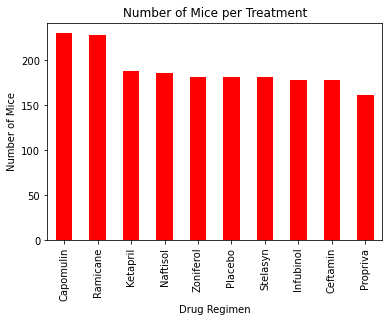

In [14]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

mice_count = clean_dataframe["Drug Regimen"].value_counts()
mice_count

plot_pandas = mice_count.plot.bar(color='r')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Treatment")





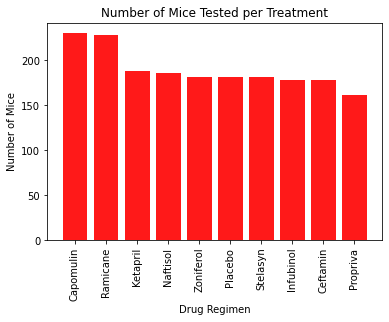

In [15]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x_axis = mice_count.index.values
y_axis = mice_count.values

plt.bar(x_axis, y_axis, color='r', alpha=0.9, align='center')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice Tested per Treatment")
plt.xticks(rotation="vertical")

plt.show()



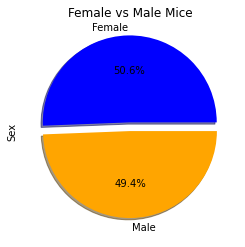

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_data= clean_dataframe["Sex"].value_counts()

plt.title("Female vs Male Mice")
labels=["Female","Male"]
colors=["blue", "orange"]
explode =(0.1, 0)
gender_data.plot.pie(labels=labels, colors=colors, explode=explode, shadow=True, autopct="%1.1f%%")


plt.show()

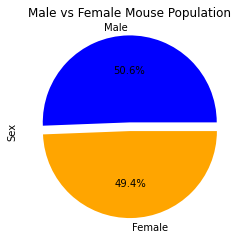

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ['Female', 'Male']

sizes = [49.50, 50.70]

colors = ["blue", "Orange"]

explode = (0.1, 0)

plot = gender_data.plot.pie(y='Total Count', colors=colors, explode=explode, autopct="%1.1f%%")

plt.title('Male vs Female Mouse Population')

plt.ylabel('Sex')

plt.show()



## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin



# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#Start by getting the last(greatest) timepoint for each mouse


max_timepoint=mouse_results_study.groupby(['Mouse ID'])['Timepoint'].max()
max_timepoint


Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 249, dtype: int64

In [19]:
# Merge this group df with the original dataframe to get the tumour volume at the last timepoint

tx_df = pd.merge(max_timepoint, mouse_results_study, on=(["Mouse ID","Timepoint"]))
tx_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumour Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [20]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumour vol data (for plotting)

tumour_vol_data = []


    
    # Locate the rows which contain mice on each drug and get the tumour volumes
for treatment in treatments:
    tx_regimen = tx_df.loc[tx_df["Drug Regimen"] == treatment]
    tumour_vol = tx_regimen["Tumour Volume (mm3)"]

    
    
    # add subset 
    tumour_vol_data.append(tumour_vol)
    
    
   

In [21]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

quartile0 = tumour_vol_data[0].quantile([.25,.5,.75])
lowerq0 = quartile0[0.25]
upperq0 = quartile0[0.75]
IQR0 = upperq0-lowerq0

quartile1 = tumour_vol_data[1].quantile([.25,.5,.75])
lowerq1 = quartile1[0.25]
upperq1 = quartile1[0.75]
IQR1 = upperq1-lowerq1

quartile2 = tumour_vol_data[2].quantile([.25,.5,.75])
lowerq2 = quartile2[0.25]
upperq2 = quartile2[0.75]
IQR2 = upperq2-lowerq2


quartile3 = tumour_vol_data[3].quantile([.25,.5,.75])
lowerq3 = quartile3[0.25]
upperq3 = quartile3[0.75]
IQR3 = upperq3-lowerq3



 # Determine outliers using upper and lower bounds
    
lower_bound0 = lowerq0 - (1.5*IQR0)
upper_bound0 = upperq0 + (1.5*IQR0)

lower_bound1 = lowerq1 - (1.5*IQR1)
upper_bound1 = upperq1 + (1.5*IQR1)
    
lower_bound2 = lowerq2 - (1.5*IQR2)
upper_bound2 = upperq2 + (1.5*IQR2)
    

lower_bound3 = lowerq3 - (1.5*IQR3)
upper_bound3 = upperq3 + (1.5*IQR3)


#print values
print(f"For {treatments[0]} values beolw {lower_bound0} and above {upper_bound0} could be outliers")
print(f"For {treatments[1]} values beolw {lower_bound0} and above {upper_bound0} could be outliers")                                       
print(f"For {treatments[2]} values beolw {lower_bound0} and above {upper_bound0} could be outliers")                                                                                                                   
print(f"For {treatments[3]} values beolw {lower_bound0} and above {upper_bound0} could be outliers")                                                                                                                
    


For Capomulin values beolw 20.70456164999999 and above 51.83201549 could be outliers
For Ramicane values beolw 20.70456164999999 and above 51.83201549 could be outliers
For Infubinol values beolw 20.70456164999999 and above 51.83201549 could be outliers
For Ceftamin values beolw 20.70456164999999 and above 51.83201549 could be outliers


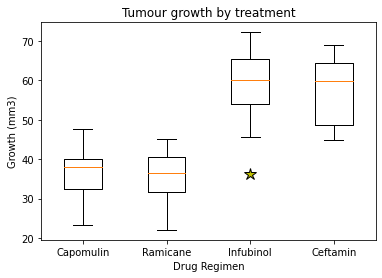

In [22]:
# Generate a box plot of the final tumour volume of each mouse across four regimens of interest

flierprops = dict(marker='*', markerfacecolor='y', markersize=13, linestyle='none')

fig1, ax1 = plt.subplots()
ax1.set_xlabel("Drug Regimen")
ax1.set_ylabel("Growth (mm3)")
ax1.set_title("Tumour growth by treatment")
ax1.boxplot(tumour_vol_data, flierprops = flierprops, labels = treatments)

plt.show()


## Line and Scatter Plots

In [23]:
# Generate a line plot of tumour volume vs. time point for a mouse treated with Capomulin

cap_mice = clean_dataframe.loc[clean_dataframe['Drug Regimen'] == "Capomulin"]
cap_mice.value_counts("Mouse ID")


Mouse ID
b128    10
b742    10
x401    10
w914    10
v923    10
u364    10
t565    10
s710    10
s185    10
r944    10
r554    10
m957    10
m601    10
l897    10
l509    10
j119    10
i738    10
i557    10
g316    10
g288    10
y793    10
j246     8
f966     5
r157     4
w150     3
dtype: int64

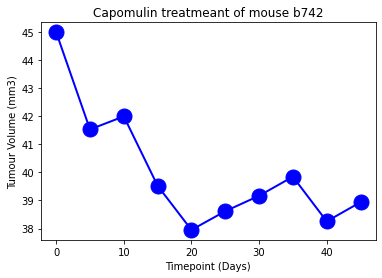

In [24]:

forline_df = clean_dataframe.loc[clean_dataframe["Mouse ID"] == "b742",:]
forline_df.head()
x_axis = forline_df["Timepoint"]
tumsiz = forline_df["Tumour Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse b742')
plt.plot(x_axis, tumsiz,linewidth=2, markersize=15,marker="o",color="blue", label="Fahreneit")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumour Volume (mm3)')
plt.show()

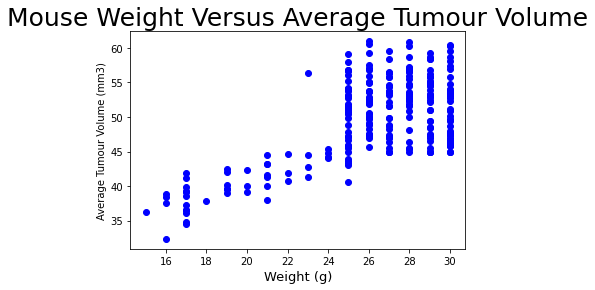

,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
Mouse ID,,,,,
a203,20.0,23.0,22.5,56.312708,1.100000
a251,21.0,25.0,22.5,55.237095,0.800000
a262,17.0,29.0,22.5,58.611631,2.300000
a275,20.0,28.0,22.5,52.770965,1.200000
a366,16.0,29.0,15.0,54.639906,0.142857


In [25]:
# Generate a scatter plot of average tumour volume vs. mouse weight for the Capomulin regimen
fig1, ax1 = plt.subplots()
avg_capm_vol = clean_dataframe.groupby(['Mouse ID']).mean()

marker_size=15
plt.scatter(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumour Volume (mm3)'], color="blue")
plt.title('Mouse Weight Versus Average Tumour Volume', fontsize=25)
plt.xlabel('Weight (g)', fontsize=13)
plt.ylabel('Average Tumour Volume (mm3)')
plt.show()
avg_capm_vol.head()



## Correlation and Regression

In [26]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumour volume for the Capomulin regimen(x_values, y_values)

correlation = st.pearsonr(avg_capm_vol['Weight (g)'], avg_capm_vol['Tumour Volume (mm3)'])
print(f"Ther Correlation beetween mouse weight and average tumour volume is {round(correlation[0],2)}")


Ther Correlation beetween mouse weight and average tumour volume is 0.66


The r-squared is: 0.435


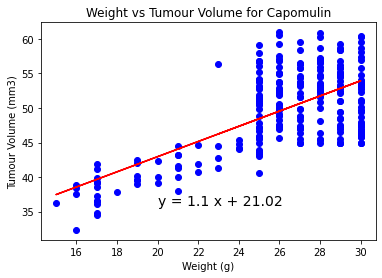

In [27]:




(slope, intercept,rvalue, pvalue, stderr)= st.linregress(avg_capm_vol["Weight (g)"],avg_capm_vol["Tumour Volume (mm3)"])
regress_values=avg_capm_vol["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"




plt.scatter(avg_capm_vol["Weight (g)"],avg_capm_vol["Tumour Volume (mm3)"],color='b')
plt.plot(avg_capm_vol["Weight (g)"], regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel("Weight (g)")
plt.ylabel("Tumour Volume (mm3)")
plt.title("Weight vs Tumour Volume for Capomulin")

print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()